In [24]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
from scipy.sparse import csr_matrix
import matplotlib.image as mpimg
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)

35 35


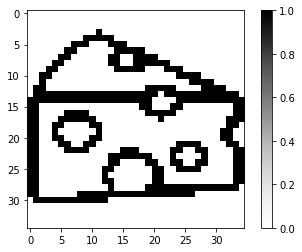

In [25]:
# image 
pics   = mpimg.imread('cheese.png')
pics   = 1-pics[:,:,1]
pics   = pics[::15,::15]
n,m    = pics.shape
npts   = n*m
ipts   = npts
print(n,m)

imgplot = plt.imshow(pics, cmap='Greys')
plt.colorbar()
plt.show()

(1225, 1225)
(1225, 1225) (1225, 1)
(1225, 1225)


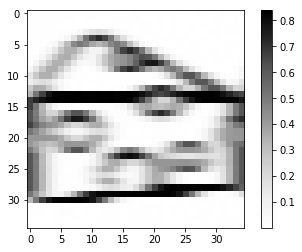

In [31]:
sig = 1.5
wid = 3
scale = 0.05

a = np.concatenate([np.exp(-np.array(range(0,wid))**2/(2*sig**2)), np.zeros(ipts-wid)])
g = toeplitz(a)
g = csr_matrix(g)
g = (1/(2*np.pi*sig**2))*np.kron(g,g)

print(g.shape)


picv   = pics.reshape((npts,1))
picv   = csr_matrix(picv)
#gs     = csr_matrix(g)
gs = g
np.random.seed(0)
print(gs.shape, picv.shape)
d      = gs.dot(picv) + np.random.rand(npts,1)*0.01

di = d.reshape(n,m)
print(gs.shape)
imgplot = plt.imshow(di, cmap='Greys')
plt.colorbar()
plt.show()

In [15]:
m0 = np.zeros((npts,1))
print(m0.shape)
m0 = csr_matrix(m0)
s0 = d-np.dot(gs,m0)
print(s0.shape)
r0 = np.dot(gs.T, s0)
print(r0.shape)
p0 = r0
q0 = np.dot(gs,p0)
print(q0.shape)


(1225, 1)
(1225, 1)
(1225, 1)
(1225, 1)


In [16]:
nints = 10

for k in range(nints):
    if k == 0:
        rk = r0
        qk = q0
        mk = m0
        pk = p0
        sk = s0
    else:
        t = 1
        
    ak1 = np.dot(rk.T,rk)/np.dot(qk.T,qk)
    print(ak1)
    #mk1 = mk+np.dot(ak1,pk)
    mk1 = mk+ak1*pk
    #sk1 = sk-np.dot(ak1.T,qk)
    sk1 = sk-ak1*qk
    rk1 = np.dot(gs.T,sk1)
    bk1 = np.dot(rk1.T,rk1)/np.dot(rk.T,rk)
    pk1 = rk1+np.dot(bk1.T,pk)
    qk1 = np.dot(gs,pk1)
    
    rk = rk1
    qk = qk1
    mk = mk1
    pk = pk1
    qk = qk1
    sk = sk1
    
    
    
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

